# Проект № 2. Анализируем воронки

## Оглавление.

1. [Цели и задачи исследования](#id_1)
2. [Получение данных и их первичный анализ](#id_2)
3. [Задача № 1. Анализ времени прохождения различных этапов](#id_3)
4. [Задача № 2. Анализ зависимости между вероятностью оплаты тренировки и пройденного обучения](#id_4)
5. [Дополнительная задача. Анализ поведения пользователей](#id_5)	
6. [Выводы](#id_6)

<a id="id_1"></a>

## Цели и задачи исследования

- **Задача 1**. Отличается ли время прохождения различных этапов для пользователей, которые прошли обучение, от пользователей, не начинавших обучение? Насколько обучение сокращает время прохождения этапов?
- **Задача 2**. Существует ли зависимость между вероятностью оплаты тренировки и количеством обучений, которые начинал или завершал пользователь. Нужно доказать, что успешное обучение влияет на оплату само по себе, без разницы, какое оно было по порядку
- **Дополнительная задача**. Как часто пользователи начинают обучение после того, как они выбрали уровень сложности тренировок? Это позволит нам понять, насколько процесс работы с приложением понятен для пользователей: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.

<a id="id_2"></a>

## Получение данных и их первичный анализ

### Импорт библиотек и получение данных для анализа

In [1]:
# Импортируем библиотеки для работы
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Наши данные хранятся в файлах events.csv и purchase.csv которые были предварительно выгружены из БД.
# Загрузим файл events.csv, содержащий данные по событиям пользователей в датафрейм events_df
events_df = pd.read_csv('events.csv')
# А файл purchase.csv, содержащий данные по оплатам пользователей - в датафрейм purchase_df
purchase_df = pd.read_csv('purchase.csv')

### Первичный анализ полученных данных

#### Датафрейм с данными по событиям пользователей (events_df)

In [3]:
# Выведем первые пять строк нашего датафрейма
events_df.head(5)

,event_type,selected_level,start_time,tutorial_id,user_id,id
0,registration,NaN,2018-01-01 04:51:58,NaN,47758,147264
1,registration,NaN,2018-01-01 08:32:05,NaN,47759,147268
2,registration,NaN,2018-01-01 09:30:10,NaN,47760,147269
3,registration,NaN,2018-01-01 09:39:27,NaN,47761,147270
4,registration,NaN,2018-01-01 11:41:27,NaN,47762,147271


In [4]:
# Воспользуемся методом "info()" для первичного исследования датафрейма (общая информация, типы данных, пропущенные значения)
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82779 entries, 0 to 82778
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   event_type      82779 non-null  object 
 1   selected_level  10198 non-null  object 
 2   start_time      82779 non-null  object 
 3   tutorial_id     41201 non-null  float64
 4   user_id         82779 non-null  int64  
 5   id              82779 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.8+ MB


Датафрейм events_df состоит из 82779 и 6 столбцов. Рассмотрим каждый столбец подробнее:
- столбец **"event_type"** (тип события) имеет тип данных "object";
- столбец **"selected_level"** (выбранный уровень сложности обучения) имеет тип данных "object"; 
- столбец **"start_time"** (дата и время события) имеет тип данных "object";
- столбец **"tutorial_id"** (идентификатор обучения) имеет тип данных "float64";
- столбец **"user_id"** (уникальный идентификатор пользователя приложения) имеет тип данных "int64";
- столбец **"id"** (идентификатор события) имеет тип данных "int64"

Столбцы **"event_type"**, **"start_time"**, **"user_id"** и **"id"** не содержат пропущенных значений, а в столбцах **"selected_level"** и **"tutorial_id"** имеются пропущенные значения:
- столбец **"selected_level"** содержит 10198  непустых значений;
- столбец **"tutorial_id"** содержит 41201 непустых значений.

Преобразуем столбец **"start_time"** в тип datetime с помощью метода pd.to_datetime():

In [5]:
events_df['start_time'] = pd.to_datetime(events_df['start_time'])
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82779 entries, 0 to 82778
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_type      82779 non-null  object        
 1   selected_level  10198 non-null  object        
 2   start_time      82779 non-null  datetime64[ns]
 3   tutorial_id     41201 non-null  float64       
 4   user_id         82779 non-null  int64         
 5   id              82779 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 3.8+ MB


In [6]:
# Проверим причины появления в нашем датафрейме пропущенных значений. Для этого сделаем срез
# датафрейма, который будет содержать только строки со значением 'level_choice' в столбце 'event_type'
events_df[events_df['event_type'] == 'level_choice'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10198 entries, 13 to 82775
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_type      10198 non-null  object        
 1   selected_level  10198 non-null  object        
 2   start_time      10198 non-null  datetime64[ns]
 3   tutorial_id     0 non-null      float64       
 4   user_id         10198 non-null  int64         
 5   id              10198 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 557.7+ KB


Как видно, этот срез датафрейма не содержит пропущенных значений в столбце **"selected_level"**, но зато содержит пропуски 
в **"tutorial_id"**. Это связано с тем, что для событий типа **"level_choice"** не предусмотрена запись параметра **"tutorial_id"**.

In [7]:
# Далее сделаем сред датафрейма, который будет содержать только строки со значением 
# 'tutorial_start' и 'tutorial_finish' в столбце 'event_type' 
events_df[events_df['event_type'].isin(['tutorial_start', 'tutorial_finish'])].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41201 entries, 6 to 82778
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_type      41201 non-null  object        
 1   selected_level  0 non-null      object        
 2   start_time      41201 non-null  datetime64[ns]
 3   tutorial_id     41201 non-null  float64       
 4   user_id         41201 non-null  int64         
 5   id              41201 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 2.2+ MB


Мы видим, что столбец **"selected_level"** в таком срезе не содержит ни одного значения. Это связано с тем, что для событий, связанных с обучением, отсутствуют параметры выбора уровня сложности **"selected_level"**. А вот остальные столбцы заполнены полностью.

In [8]:
# Для исследования данных содержащихся в нашем датафрейме вызовем метод describe() 
# с ключом include='all' который позволит получить основные статистические данные по всем столбцам. 
events_df.describe(include='all')

,event_type,selected_level,start_time,tutorial_id,user_id,id
count,82779,10198,82779,41201.000000,82779.000000,82779.000000
unique,5,3,82622,NaN,NaN,NaN
top,registration,medium,2018-03-01 09:53:30,NaN,NaN,NaN
freq,24460,5776,4,NaN,NaN,NaN
first,NaN,NaN,2018-01-01 04:51:58,NaN,NaN,NaN
last,NaN,NaN,2019-01-01 09:03:24,NaN,NaN,NaN
mean,NaN,NaN,NaN,60853.276207,59932.814446,188656.000568
std,NaN,NaN,NaN,6525.340246,7074.775488,23896.384413
min,NaN,NaN,NaN,49555.000000,47758.000000,147264.000000
25%,NaN,NaN,NaN,55199.000000,53769.500000,167961.500000


In [9]:
# Посмотрим, какие уникальные значения содержатся в столбце 'event_type':
events_df['event_type'].unique()

array(['registration', 'tutorial_start', 'tutorial_finish',
       'level_choice', 'training_choice'], dtype=object)

In [10]:
# И в столбце 'selected_level':
events_df['selected_level'].unique()

array([nan, 'hard', 'easy', 'medium'], dtype=object)

#### Датафрейм с данными по оплатам пользователей (purchase_df)

In [11]:
# Выведем первые пять строк нашего датафрейма
purchase_df.head(5)

,user_id,start_time,amount,id
0,67986,2018-11-17 13:18:35,50,20103
1,58528,2018-06-23 23:24:43,100,19351
2,61351,2018-08-08 09:40:36,100,19565
3,48037,2018-01-10 13:08:34,50,18470
4,67987,2018-11-13 22:51:38,100,20087


In [12]:
# Воспользуемся методом "info()" для первичного исследования датафрейма (общая информация, типы данных, пропущенные значения)
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     1974 non-null   int64 
 1   start_time  1974 non-null   object
 2   amount      1974 non-null   int64 
 3   id          1974 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 61.8+ KB


Датафрейм purchase_df состоит из 1974 и 4 столбцов. Рассмотрим каждый столбец подробнее:
- столбец **"user_id"** (уникальный идентификатор пользователя приложения) имеет тип данных "int64"; 
- столбец **"start_time"** (дата и время события) имеет тип данных "object";
- столбец **"amount"** (идентификатор обучения) имеет тип данных "int64";
- столбец **"id"** (идентификатор события) имеет тип данных "int64"

Пропущенных значений данный датафрейм не содержит. Это значит, что для каждой строки в каждом столбце присутствует значение.

Преобразуем столбец **"start_time"** в тип datetime с помощью метода pd.to_datetime():

In [13]:
purchase_df['start_time'] = pd.to_datetime(purchase_df['start_time'])
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     1974 non-null   int64         
 1   start_time  1974 non-null   datetime64[ns]
 2   amount      1974 non-null   int64         
 3   id          1974 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 61.8 KB


In [14]:
# Для исследования данных содержащихся в нашем датафрейме вызовем метод describe() 
# с ключом include='all' который позволит получить основные статистические данные по всем столбцам. 
purchase_df.describe(include='all')

,user_id,start_time,amount,id
count,1974.000000,1974,1974.000000,1974.000000
unique,NaN,1973,NaN,NaN
top,NaN,2018-04-19 15:42:47,NaN,NaN
freq,NaN,2,NaN,NaN
first,NaN,2018-01-03 07:30:09,NaN,NaN
last,NaN,2019-01-08 00:58:57,NaN,NaN
mean,59962.116515,NaN,107.801418,19432.507092
std,7033.436103,NaN,56.747492,570.020623
min,47771.000000,NaN,25.000000,18444.000000
25%,53891.500000,NaN,50.000000,18939.250000


<a id="id_3"></a>

## Задача № 1. Анализ времени прохождения различных этапов

### Подготовка  к анализу и проведение расчетов

In [15]:
# Разобьем наших пользователей на группы. 
# В одной группе будут пользователи, которые проходили обучение (у таких пользователей присутствует 
# событие 'tutorial_start').
# В другой группе буду пользователи, которые не проходили обучение, а сразу перешли к выбору 
# уровня сложности.

users_with_tutorial = events_df[events_df['event_type'] == 'tutorial_start']['user_id'].unique()
set_users_with_tutorial = set(users_with_tutorial)
all_users = events_df[events_df['event_type']== 'registration']['user_id'].unique()
set_all_users = set(all_users)
set_users_wo_tutorial = set_all_users.difference(set_users_with_tutorial)
print()
print(f'Количество уникальных пользователей: {len(set_all_users)}')
print(f'Количество пользователей, которые прошли обучение: {len(set_users_with_tutorial)}')
print(f'Количество пользователей, которые не проходили обучение, а сразу перешли к выбору уровня сложности: {len(set_users_wo_tutorial)}')


Количество уникальных пользователей: 24460
Количество пользователей, которые прошли обучение: 14551
Количество пользователей, которые не проходили обучение, а сразу перешли к выбору уровня сложности: 9909


In [16]:
# Теперь рассчитаем для каждой группы пользователей среднее время между различными этапами:
# - между временем регистрации и выбором уровня сложности;
# - выбором уровня сложности и выбором тренировок;
# - выбором тренировок и оплатой;

user_groups = [
    {'прошли обучение': set_users_with_tutorial},
    {'не начинали обучение': set_users_wo_tutorial}
]
new_list_0 = ['Среднее время между регистрацией и выбором уровня сложности']
new_list_1 = ['Среднее время между выбором уровня сложности и выбором тренировок']
new_list_2 = ['Среднее время Среднее время между выбором тренировок и оплатой']
for group in user_groups:
    level = list(group.keys())[0]
    group_users = group[level]
    purchase_df_slice = purchase_df[purchase_df['user_id'].isin(group_users)]
    reg_df = events_df[(events_df['event_type'] == 'registration') & (events_df['user_id'].isin(group_users))]
    level_choice_df = events_df[(events_df['event_type'] == 'level_choice') & (events_df['user_id'].isin(group_users))]
    training_choice_df = events_df[(events_df['event_type'] == 'training_choice') & (events_df['user_id'].isin(group_users))]    
    if (level_choice_df['user_id'].value_counts().mean()) == 1 and (training_choice_df['user_id'].value_counts().mean()) ==1 and (reg_df['user_id'].value_counts().mean()) == 1:
        reg_df = reg_df[['user_id','start_time']].rename(columns={'start_time':'registration_time'})
        level_choice_df = level_choice_df[['user_id','start_time']].rename(columns={'start_time':'level_choice_time'})
        training_choice_df = training_choice_df[['user_id','start_time']].rename(columns={'start_time':'training_choice_time'})
        purchase_df_slice = purchase_df_slice[['user_id','start_time']].rename(columns={'start_time':'purchase_time'})
        
        merged_df_0 =reg_df.merge(level_choice_df, how='inner', on='user_id')
        merged_df_0['timedelta'] = merged_df_0['level_choice_time'] - merged_df_0['registration_time']
        mean_time_0 = merged_df_0['timedelta'].mean()
        
        merged_df_1 = training_choice_df.merge(level_choice_df,on='user_id',how='inner')
        merged_df_1['timedelta'] = merged_df_1['training_choice_time'] - merged_df_1['level_choice_time']
        mean_time_1 = merged_df_1['timedelta'].mean()
        
        merged_df_2 = purchase_df_slice.merge(training_choice_df,on='user_id',how='inner')
        merged_df_2['timedelta'] = merged_df_2['purchase_time'] - merged_df_2['training_choice_time']
        mean_time_2 = merged_df_2['timedelta'].mean()
        
        print ('Для пользователей, которые {}:'.format(level))
        print()
        print ('Среднее время между временем регистрации и выбором уровня сложности: {} ({} минут)'.format(mean_time_0,round((merged_df_0['timedelta']/pd.Timedelta('1 minute')).mean(),2) ))
        new_list_0.append(round((merged_df_0['timedelta']/pd.Timedelta('1 minute')).mean(),2))
        print()
        print ('Среднее время между выбором уровня сложности и выбором тренировок: {} ({} минут)'.format(mean_time_1, round((merged_df_1['timedelta']/pd.Timedelta('1 minute')).mean(),2)))
        new_list_1.append(round((merged_df_1['timedelta']/pd.Timedelta('1 minute')).mean(),2))
        print()
        print ('Среднее время между выбором тренировок и оплатой: {} ({} часов)'.format( mean_time_2, round( ( merged_df_2['timedelta']/pd.Timedelta('1 hour') ).mean(),2 ) ))
        new_list_2.append(round((merged_df_2['timedelta']/pd.Timedelta('1 hour')).mean(),2))
        print()
        print('----------------------------------------------')
        print()
    else:
        print ('Более 1 события')

# Создадим необходимые датафреймы для построения графиков.
delta_time_list = []
delta_time_list.append(new_list_0)
delta_time_list.append(new_list_1)
delta_time_list.append(new_list_2)

delta_time_df = pd.DataFrame(delta_time_list, columns = ['event_type', 'pass', 'not_pass'])
delta_time_df_reg_vs_level = delta_time_df.drop([1,2])
delta_time_df_level_vs_choice = delta_time_df.drop([0,2])
delta_time_df_choice_vs_purchase = delta_time_df.drop([0,1])

# Посчитаем сколько процентов в среднем составляет разница во времени для каждого этапа
level_vs_choice = ((delta_time_df['not_pass'][1] - delta_time_df['pass'][1])/delta_time_df['pass'][1] + (delta_time_df['not_pass'][1] - delta_time_df['pass'][1])/delta_time_df['not_pass'][1]) / 2
choice_vs_purchase = ((delta_time_df['not_pass'][2] - delta_time_df['pass'][2])/delta_time_df['pass'][2] + (delta_time_df['not_pass'][2] - delta_time_df['pass'][2])/delta_time_df['not_pass'][2]) / 2
print( 'Разница во времени между этапом выбора уровня сложности и выбором набора тренировок составляет в среднем {:.2%}'.format(level_vs_choice))
print( 'Разница во времени между этапом выбором набора тренировок и оплаты составляет в среднем {:.2%}'.format(choice_vs_purchase))


Для пользователей, которые прошли обучение:

Среднее время между временем регистрации и выбором уровня сложности: 0 days 07:10:02.233970 (430.04 минут)

Среднее время между выбором уровня сложности и выбором тренировок: 0 days 00:05:09.649422 (5.16 минут)

Среднее время между выбором тренировок и оплатой: 3 days 17:08:33.518916 (89.14 часов)

----------------------------------------------

Для пользователей, которые не начинали обучение:

Среднее время между временем регистрации и выбором уровня сложности: 0 days 05:10:36.233644 (310.6 минут)

Среднее время между выбором уровня сложности и выбором тренировок: 0 days 00:05:31.077922 (5.52 минут)

Среднее время между выбором тренировок и оплатой: 3 days 23:07:16.111111 (95.12 часов)

----------------------------------------------

Разница во времени между этапом выбора уровня сложности и выбором набора тренировок составляет в среднем 6.75%
Разница во времени между этапом выбором набора тренировок и оплаты составляет в среднем 6.50%


### Визуализация к задаче 1

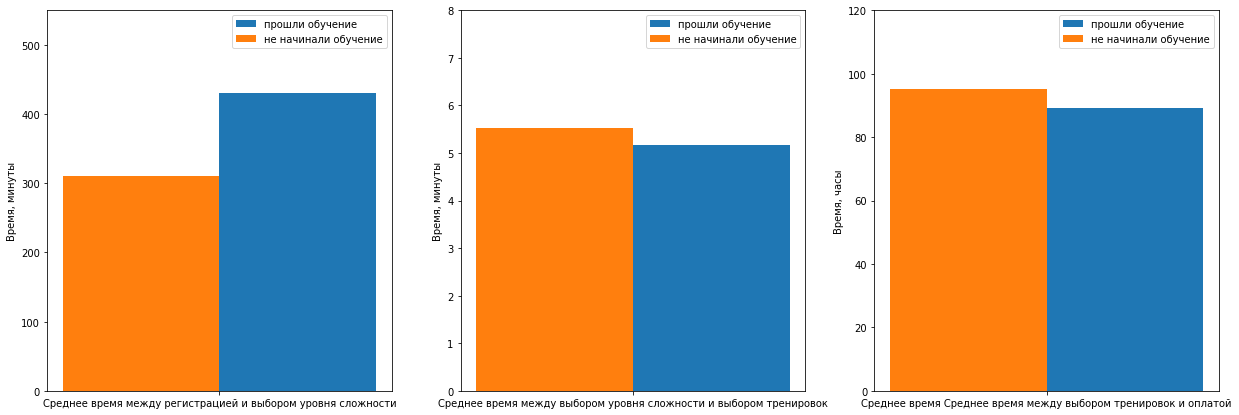

In [17]:
# Построим столбчатые диаграммы, которые отражают время прохождения различных этапов для пользователей двух наших групп 
fig, axes = plt.subplots(1, 3, figsize=(21,7))

axes[0].set_ylim(0,550)
axes[0].set_ylabel('Время, минуты')
axes[0].bar(x = delta_time_df_reg_vs_level['event_type'], height = delta_time_df_reg_vs_level['pass'], width = 0.1, align='edge', label = 'прошли обучение')
axes[0].bar(x = delta_time_df_reg_vs_level['event_type'], height = delta_time_df_reg_vs_level['not_pass'], width = -0.1, align='edge', label = 'не начинали обучение')
axes[0].legend(loc = 1)

axes[1].set_ylim(0,8)
axes[1].set_ylabel('Время, минуты')
axes[1].bar(x = delta_time_df_level_vs_choice['event_type'], height = delta_time_df_level_vs_choice['pass'], width = 0.1, align='edge', label = 'прошли обучение')
axes[1].bar(x = delta_time_df_level_vs_choice['event_type'], height = delta_time_df_level_vs_choice['not_pass'], width = -0.1, align='edge', label = 'не начинали обучение')
axes[1].legend(loc = 1)

axes[2].set_ylim(0,120)
axes[2].set_ylabel('Время, часы')
axes[2].bar(x = delta_time_df_choice_vs_purchase['event_type'], height = delta_time_df_choice_vs_purchase['pass'], width = 0.1, align='edge', label = 'прошли обучение')
axes[2].bar(x = delta_time_df_choice_vs_purchase['event_type'], height = delta_time_df_choice_vs_purchase['not_pass'], width = -0.1, align='edge', label = 'не начинали обучение')
axes[2].legend(loc = 1)

### Краткие выводы по задаче 1

**Первый этап**: между регистрацией и выбором уровня сложности мы видим, что среднее время прохождения данного этапа меньше у тех пользователей, которые не проходили обучение. Скорее всего это связано с тем, что на прохождение обучения затрачивается дополнительное время, поэтому данный этап не подходит для анализа.

**Следующий этап**: между выбором уровня сложности и выбором набора тренировок. Здесь мы видим, что среднее время прохождения данного этапа меньше у тех пользователей, которые прошли обучение. Правда разница во времени небольшая (5.52 минуты - 5.16 минут = 0,36 минут, т.е примерно полминуты). В относительных величинах разница составляет примерно 6,75 %  

**Последний этап**: между выбором набора тренировок и оплатой. Среднее время прохождения данного этапа также меньше у пользователей, прошедших обучение чем у пользователей, которые обучение не проходили. Разница в среднем составляет около 6 часов в абсолютных значениях. Но так как на данный этап пользователи в среднем тратят более 3-х дней, то в относительных показателях разница получается небольшая (в среднем примерно 6,5%). 

**Вывод**: прохождение обучения сокращает среднее время прохождения этапов примерно на 6,6 %

<a id="id_4"></a>

## Задача № 2. Анализ зависимости между вероятностью оплаты тренировки и пройденного обучения

### Подготовка  к анализу и проведение расчетов

In [18]:
# Создадим датафрейм в котором будут содержаться два столбца: user_id и количество обучений, 
# который данный пользователь совершил. 
# Посмотрим какое количество обучений совершали наши пользователи.
users_with_f_tutorial = events_df[events_df['event_type'] == 'tutorial_finish']
users_with_f_tutorial = users_with_f_tutorial['user_id'].value_counts()
df_temp = pd.DataFrame({'user_id':users_with_f_tutorial.index, 'count':users_with_f_tutorial.values})
df_temp['count'].unique()

array([9, 8, 7, 6, 5, 4, 3, 2, 1], dtype=int64)

In [19]:
# Итак, наши пользователи, которые проходили обучение, делали это от 1 до 9 раз.
# Посчитаем сначала какой процент пользователей оплатили тренировки из числа тех, кто не совершал 
# обучение. 
# Затем создадим группы пользователей и для каждой группы посчитаем процент пользователей 
# оплативших тренировки.
# Результат запишем в новый датафрем.
purchase_df_2 = purchase_df[purchase_df['user_id'].isin(set_users_wo_tutorial)]
purchase_df_2['user_id'].nunique()
if (purchase_df_2['user_id'].value_counts().mean()) == 1:
    percent_of_purchase_2 = purchase_df_2['user_id'].nunique()/len(set_users_wo_tutorial)
    print ('Процент пользователей, оплативших тренировки (от числа пользователей, которые ни разу не начинали обучение): {:.2%}'.format(percent_of_purchase_2))
    print()
else:
    print ('Более 1 события')
s = []
d = {}
d[0] = round(percent_of_purchase_2*100, 2)
users_count_list = []
users_pay_count_list = []
for i in range(1,10):
    users_w_tutorials = df_temp[df_temp['count'] == i]['user_id']
    set_users_w_tutorials = set(users_w_tutorials)
    users_count_list.append(len(set_users_w_tutorials))
    purchase_df_t = purchase_df[purchase_df['user_id'].isin(set_users_w_tutorials)]
    users_pay_count_list.append(len(purchase_df_t))
    percent_of_purchase = purchase_df_t['user_id'].nunique()/len(set_users_w_tutorials)
    s.append(percent_of_purchase)
    d[i] = round(percent_of_purchase*100, 2)
    if 1 < i <= 4:
        print ('Процент пользователей, оплативших тренировки (от числа пользователей, завершивших обучение {} раза): {:.2%}'.format(i, percent_of_purchase))
        print()
    else:    
        print ('Процент пользователей, оплативших тренировки (от числа пользователей, завершивших обучение {} раз): {:.2%}'.format(i, percent_of_purchase)) 
        print()
print('В среднем тренировки оплачивают {:.2%} пользователей хотя бы раз прошедших обучение. Доля пользователей, покупающих тренировки, которые ни разу не проходили обучение ничтожно мала и составляет около {:.2%}.'.format(sum(s)/len(s), percent_of_purchase_2))
print()
print('Количество пользователей, которые проходили обучение хотя бы раз (в порядке возрастания количества обучений: {})'.format(users_count_list))
print()
print('Количество пользователей, которые оплатили тренировки после пройденного(-ых) обучений (в порядке возрастания количества обучений: {})'.format(users_pay_count_list))
df_pers = pd.DataFrame(pd.Series(d), columns=['persent_of_purchase'])

Процент пользователей, оплативших тренировки (от числа пользователей, которые ни разу не начинали обучение): 0.18%

Процент пользователей, оплативших тренировки (от числа пользователей, завершивших обучение 1 раз): 14.05%

Процент пользователей, оплативших тренировки (от числа пользователей, завершивших обучение 2 раза): 14.70%

Процент пользователей, оплативших тренировки (от числа пользователей, завершивших обучение 3 раза): 15.81%

Процент пользователей, оплативших тренировки (от числа пользователей, завершивших обучение 4 раза): 14.72%

Процент пользователей, оплативших тренировки (от числа пользователей, завершивших обучение 5 раз): 13.25%

Процент пользователей, оплативших тренировки (от числа пользователей, завершивших обучение 6 раз): 15.06%

Процент пользователей, оплативших тренировки (от числа пользователей, завершивших обучение 7 раз): 12.70%

Процент пользователей, оплативших тренировки (от числа пользователей, завершивших обучение 8 раз): 15.38%

Процент пользователей, оп

### Визуализация к задаче 2

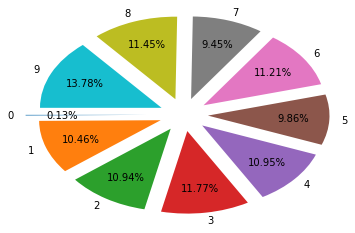

In [20]:
# Круговая диаграмма показывает процент оплат для группы пользователей в зависимости от 
# количества законченных обучений.
labels = df_pers.index
sizes = df_pers['persent_of_purchase']
explode = (0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, labeldistance=1.1, autopct='%2.2f%%',
        shadow=False, startangle=180, pctdistance = 0.7, wedgeprops = {'linewidth': 5})
ax1.axis('tight')
plt.show()

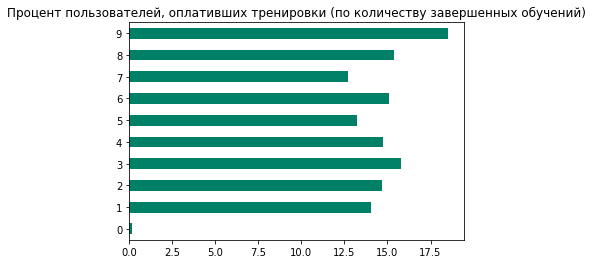

In [21]:
# Также построим горизонтальную столбчатую диаграмму
df_pers['persent_of_purchase'].plot(kind='barh', grid=False, colormap='summer', title='Процент пользователей, оплативших тренировки (по количеству завершенных обучений)')

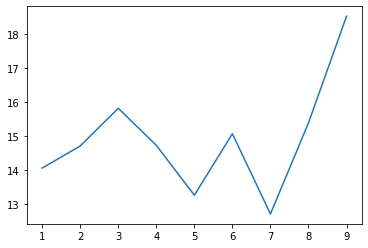

In [22]:
# Дополнительно построим линейный график. Он наглядно иллюстрирует линию тренда.
# Удалим первую строку в нашем датафрейме, т.к. она содержит информацию о пользователях,
# не прошедших обучение.
df_pers_1 = df_pers.drop([0])
df_pers_1['persent_of_purchase'].plot()

### Краткие выводы по задаче 2

В результате проведенного исследования, можно сделать следующий вывод: пользователи которые проходили обучение чаще покупают платные тренировки чем пользователи, которые обучения не проходили. В среднем тренировки оплачивают около 15% пользователей, которые проходили обучение хотя бы 1 раз. Доля пользователей, покупающих тренировки, которые ни разу не проходили обучение ничтожно мала и составляет около 0.18%.

Рассмотрим зависимость вероятности оплаты тренировки от количества обучений, которые завершил пользователь. В нижеприведенной таблице указаны полученные показатели в ходе исследования:


|Количество завершенных обучений|Процент оплативших пользователей|Количество пользователей|
|:------:|:------:|:-----:|
|1	  |14.05%|9721 |
|2	  |14.70%|1599|
|3	  |15.81%| 430|
|4	  |14.72%|231|
|5    |13.25%|166|
|7    |12.70%|126|
|8	  |15.38%| 65|
|9	  |18.52%| 27|


Проанализировав полученные результаты, мы видим, что несмотря на то, что, хотя процентное соотношение пользователей изменяется с увеличением количества завершенных обучений, сделать однозначно сказать, что с увеличением количества завершенных обучений возрастает вероятность оплаты. В целом изменения составляют ± 2-3% что находится в пределах статистической погрешности. Также мы видим, что очень малая часть пользователей совершает повторные обучения. Например, если одно обучение завершили почти 10 тыс. пользователей, то 9 обучений прошли только 27. Имея подобные аномалии в данных невозможно достоверно подтвердить гипотезу о том, что с ростом количества обучений возрастает вероятность оплаты.

<a id="id_5"></a>

## Дополнительная задача. Анализ поведения пользователей

### Подготовка  к анализу и проведение расчетов

In [23]:
# Подготовим датафрейм с оплатами для объединения с датафреймом с событиями.
# Для этого создадим новый столбец 'event_type' со значением 'purchase'
# Столбец 'id' переименуем в 'purchase_id'.
# Проверим что все было выполнено правильно, для этого отобразим первые 5 строк датафрейма
purchase_df['event_type'] = 'purchase'
purchase_df = purchase_df.rename(columns={'id':'purchase_id'})
purchase_df.head(5)

,user_id,start_time,amount,purchase_id,event_type
0,67986,2018-11-17 13:18:35,50,20103,purchase
1,58528,2018-06-23 23:24:43,100,19351,purchase
2,61351,2018-08-08 09:40:36,100,19565,purchase
3,48037,2018-01-10 13:08:34,50,18470,purchase
4,67987,2018-11-13 22:51:38,100,20087,purchase


In [24]:
# В датафрейме с событиями также изменим название столбца 'id' на 'event_id'
events_df = events_df.rename(columns={'id':'event_id'})
events_df.head(5)

,event_type,selected_level,start_time,tutorial_id,user_id,event_id
0,registration,NaN,2018-01-01 04:51:58,NaN,47758,147264
1,registration,NaN,2018-01-01 08:32:05,NaN,47759,147268
2,registration,NaN,2018-01-01 09:30:10,NaN,47760,147269
3,registration,NaN,2018-01-01 09:39:27,NaN,47761,147270
4,registration,NaN,2018-01-01 11:41:27,NaN,47762,147271


In [25]:
# Объединим два датафрейма в один. В новом датафрейме сбросим индексы (т.к. они могли дублироваться и
# могут быть неактуальны), также отсортируем датафрейм по столбцу 'start_time'
# для проверки корректности объединения выведем первые 10 строк нового датафрейма.
total_df = pd.concat([events_df, purchase_df], sort=False)
total_df = total_df.reset_index(drop=True).sort_values('start_time')
total_df.head(10)

,event_type,selected_level,start_time,tutorial_id,user_id,event_id,amount,purchase_id
0,registration,NaN,2018-01-01 04:51:58,NaN,47758,147264.0,NaN,NaN
1,registration,NaN,2018-01-01 08:32:05,NaN,47759,147268.0,NaN,NaN
2,registration,NaN,2018-01-01 09:30:10,NaN,47760,147269.0,NaN,NaN
3,registration,NaN,2018-01-01 09:39:27,NaN,47761,147270.0,NaN,NaN
4,registration,NaN,2018-01-01 11:41:27,NaN,47762,147271.0,NaN,NaN
5,registration,NaN,2018-01-01 12:23:51,NaN,47763,147272.0,NaN,NaN
6,tutorial_start,NaN,2018-01-01 13:55:11,49555.0,47758,147273.0,NaN,NaN
7,tutorial_start,NaN,2018-01-01 13:56:40,49556.0,47761,147274.0,NaN,NaN
8,tutorial_finish,NaN,2018-01-01 13:59:44,49556.0,47761,147275.0,NaN,NaN
9,registration,NaN,2018-01-01 14:15:39,NaN,47764,147276.0,NaN,NaN


In [26]:
# Для каждого пользователя создадим список этапов, которые прошел данный пользователь.
# Для этого сгруппируем датафрейм по столбцу 'user_id' и применим функцию apply()
# Результат запишем в новый датафрейм user_path_df
user_path_df = total_df.groupby(['user_id'])['event_type'].apply(list).reset_index()
user_path_df

,user_id,event_type
0,47758,"[registration, tutorial_start]"
1,47759,"[registration, tutorial_start, tutorial_finish..."
2,47760,"[registration, tutorial_start, tutorial_finish..."
3,47761,"[registration, tutorial_start, tutorial_finish..."
4,47762,[registration]
...,...,...
24455,72213,"[registration, tutorial_start, tutorial_finish..."
24456,72214,"[registration, tutorial_start, tutorial_finish..."
24457,72215,[registration]
24458,72216,"[registration, tutorial_start, tutorial_finish..."


In [27]:
# Преобразуем список этапов в строку, т.к. поиск значений по спискам может занять некоторое время.
# Преобразование выполним с помощью функции apply(), аргументом которой передадим функцию, 
# которая преобразует список в строку. Для разделения этапов добавим знак '>' после каждого этапа
# Также для удобства переименуем столбец 'event_type' в 'event_path'
user_path_df['event_path'] = user_path_df['event_type'].apply(lambda x: '>'.join(x))
user_path_df

,user_id,event_type,event_path
0,47758,"[registration, tutorial_start]",registration>tutorial_start
1,47759,"[registration, tutorial_start, tutorial_finish...",registration>tutorial_start>tutorial_finish>le...
2,47760,"[registration, tutorial_start, tutorial_finish...",registration>tutorial_start>tutorial_finish>le...
3,47761,"[registration, tutorial_start, tutorial_finish...",registration>tutorial_start>tutorial_finish>le...
4,47762,[registration],registration
...,...,...,...
24455,72213,"[registration, tutorial_start, tutorial_finish...",registration>tutorial_start>tutorial_finish>tu...
24456,72214,"[registration, tutorial_start, tutorial_finish...",registration>tutorial_start>tutorial_finish>le...
24457,72215,[registration],registration
24458,72216,"[registration, tutorial_start, tutorial_finish...",registration>tutorial_start>tutorial_finish>le...


In [28]:
# Сгруппируем датафрейм по столбцу 'event_path' для получения списка путей, по которым проходили пользователи.
# Для каждого уникального значения посчитаем количество уникальных пользователей
# Результат отсортируем по убыванию количества пользователей и запишем в переменную user_paths.
user_paths = user_path_df.groupby(['event_path'])['user_id'].nunique().sort_values(ascending=False)
user_paths

event_path
registration                                                                                                                                                                                                                                            9802
registration>tutorial_start>tutorial_finish>level_choice>training_choice                                                                                                                                                                                3248
registration>tutorial_start>tutorial_finish                                                                                                                                                                                                             2425
registration>tutorial_start>tutorial_finish>level_choice                                                                                                                                                                              

In [29]:
# Посчитаем количество уникальных пользователей у которых имеется последовательность 'level_choice>tutorial_start'.
# Также посчитаем какую долю составляют эти пользователи от общего количества пользователей
persent_of_users = user_paths[user_paths.index.str.contains('level_choice>tutorial_start')].sum()/total_df['user_id'].nunique()
print('Количество пользователей, которые возвращаются к обучению после выбора уровня сложности: {}'.format(user_paths[user_paths.index.str.contains('level_choice>tutorial_start')].sum()))
print()
print('Доля таких пользователей от общего количества пользователей: {:.2%}'.format(persent_of_users))

Количество пользователей, которые возвращаются к обучению после выбора уровня сложности: 601

Доля таких пользователей от общего количества пользователей: 2.46%


### Краткие выводы по дополнительной задаче

Вывод: только около 2,5 % пользователей возвращаются к обучению после выбора уровня сложности

<a id="id_6"></a>

## Выводы

### Задача № 1. Анализ времени прохождения различных этапов

Наша задача состоит в том, чтобы на основе проведенного анализа определить:

1. отличается ли время прохождения различных этапов для пользователей, которые прошли обучение, от пользователей, не начинавших обучение? 
2. Насколько обучение сокращает время прохождения этапов?

Для этого разделим наших пользователей на 2 группы:
 1. Пользователи, которые прошли обучение;
 2. Пользователи, которые не проходили обучение, а сразу перешли к выбору уровня сложности. 

Затем мы разделим путь, который проходят пользователи от момента регистрации до момента оплаты на 3 основных этапа и определим для каждой группы пользователей среднее время прохождения каждого из этапов.

**Первый этап**: между регистрацией и выбором уровня сложности. Проанализировав данные можно увидеть, что среднее время прохождения данного этапа меньше у тех пользователей, которые не проходили обучение. Скорее всего это связано с тем, что на прохождение обучения затрачивается дополнительное время, поэтому данный этап не подходит для анализа.

**Следующий этап**: между выбором уровня сложности и выбором набора тренировок. Здесь мы видим, что среднее время прохождения данного этапа меньше у тех пользователей, которые прошли обучение. Правда разница во времени небольшая (5.52 минуты - 5.16 минут = 0,36 минут, т.е. примерно полминуты). В относительных величинах разница составляет примерно 6,75 %

**Последний этап**: между выбором набора тренировок и оплатой. Среднее время прохождения данного этапа также меньше у пользователей, прошедших обучение чем у пользователей, которые обучение не проходили. Разница в среднем составляет около 6 часов в абсолютных значениях. Но так как на данный этап пользователи в среднем тратят более 3-х дней, то в относительных показателях разница получается небольшая (в среднем примерно 6,5%).

***Подводя итоги можно сделать следующие выводы***:
1. Среднее время прохождения различных этапов для пользователей, прошедших обучение, отличается от времени для пользователей, не прошедших обучение;
2. Пользователи, прошедшие обучение, проходят этапы в среднем на 6,6% быстрее, чем пользователи, которые обучение не проходили.

### Задача № 2. Анализ зависимости между вероятностью оплаты тренировки и пройденного обучения

Наша задача состоит в том, чтобы на основании анализа данных определить существует ли зависимость между количеством обучений, которые проходил пользователь и вероятностью оплаты.

Для этого, вначале определим, какое количество обучений проходят наши пользователи. Затем мы разобьем наших пользователей на группы, соответствующие количеству обучений, прошедших пользователем. Пользователей, которые обучение не проходили мы запишем в отдельную группу. После этого для каждой группы рассчитаем процент оплат.

В нижеприведенной таблице указаны полученные показатели в ходе исследования:


|Количество завершенных обучений|Процент оплативших пользователей|Количество пользователей|
|:------:|:------:|:-----:|
|0    |0.18% |18|
|1	  |14.05%|9721 |
|2	  |14.70%|1599|
|3	  |15.81%| 430|
|4	  |14.72%|231|
|5    |13.25%|166|
|7    |12.70%|126|
|8	  |15.38%| 65|
|9	  |18.52%| 27|


В результате проведенного исследования, можно сделать следующий вывод: пользователи которые проходили обучение чаще покупают платные тренировки чем пользователи, которые обучения не проходили. В среднем тренировки оплачивают около 15% пользователей, которые проходили обучение хотя бы 1 раз. Доля пользователей, покупающих тренировки, которые ни разу не проходили обучение ничтожно мала и составляет около 0.18%.

Рассмотрим зависимость вероятности оплаты тренировки от количества обучений, которые завершил пользователь.

Проанализировав полученные результаты, мы видим, что несмотря на то, что, хотя процентное соотношение пользователей изменяется с увеличением количества завершенных обучений, сделать однозначно сказать, что с увеличением количества завершенных обучений возрастает вероятность оплаты. В целом изменения составляют ± 2-3% что находится в пределах статистической погрешности. Также мы видим, что очень малая часть пользователей совершает повторные обучения. Например, если одно обучение завершили почти 10 тыс. пользователей, то 9 обучений прошли только 27. Имея подобные аномалии в данных невозможно достоверно подтвердить гипотезу о том, что с ростом количества обучений возрастает вероятность оплаты.

***Подводя итоги можно сделать следующие выводы***:
1. Чаще всего покупают платные тренировки пользователи, прошедшие хотя бы одно обучение чем пользователи, которые обучение не проходили;
2. Вероятность оплаты обучения не зависит от количества тренировок, которые прошел пользователь
 

### Дополнительная задача. Анализ поведения пользователей

В рамках данной задачи необходимо проверить как часто пользователи начинают обучение после выбора уровня сложности тренировок.

Для этого мы объединим датафрейм с событиями и датафрейм с оплатами. Затем на основе объединённого датафрейма мы для каждого пользователя простроим путь, по которому прошел пользователь. Затем, сгруппировав пути мы получим количество пользователей, которые проходили данный путь. Нам останется найти при помощи поиска нужную последовательность событий (**level_choice -> tutorial_start**) и мы получим количество пользователей, которые возвращались к обучению после выбора уровня сложности.

произведя необходимые вычисления, мы получим следующие значения:


- Количество пользователей, которые возвращаются к обучению после выбора уровня сложности: 601
- Доля таких пользователей от общего количества пользователей: 2.46%

***Подводя итоги можно сделать следующие выводы***
1. Только около 2,5% пользователей возвращаются к обучению после выбора уровня сложности тренировок. 
